In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
import tensorflow as tf
import PIL

In [5]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
data_dir

'./datasets/flower_photos'

In [7]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [8]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/2059172936_032ffc12aa.jpg'),
 PosixPath('datasets/flower_photos/roses/4363734507_5cc4ed6e01.jpg'),
 PosixPath('datasets/flower_photos/roses/8644003462_2272de26eb.jpg'),
 PosixPath('datasets/flower_photos/roses/7211616670_2d49ecb3a5_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8667746487_781af9e615_n.jpg')]

In [9]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [10]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/2059172936_032ffc12aa.jpg'),
 PosixPath('datasets/flower_photos/roses/4363734507_5cc4ed6e01.jpg'),
 PosixPath('datasets/flower_photos/roses/8644003462_2272de26eb.jpg'),
 PosixPath('datasets/flower_photos/roses/7211616670_2d49ecb3a5_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8667746487_781af9e615_n.jpg')]

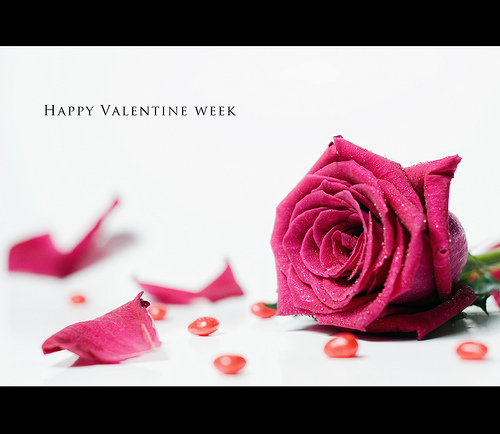

In [17]:
PIL.Image.open(str(roses[1]))

In [18]:
tulips = list(data_dir.glob('tulips/*'))

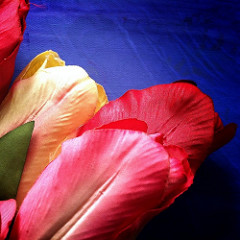

In [19]:
PIL.Image.open(str(tulips[0]))

## **Read flowers images from disk into numpy array using opencv**

In [20]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [21]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [22]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/2059172936_032ffc12aa.jpg'),
 PosixPath('datasets/flower_photos/roses/4363734507_5cc4ed6e01.jpg'),
 PosixPath('datasets/flower_photos/roses/8644003462_2272de26eb.jpg'),
 PosixPath('datasets/flower_photos/roses/7211616670_2d49ecb3a5_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8667746487_781af9e615_n.jpg')]

In [23]:

str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/2059172936_032ffc12aa.jpg'

In [25]:
import cv2

In [26]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [27]:
img.shape

(378, 500, 3)

In [28]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [29]:

X, y = [], []

In [30]:
for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [31]:
X = np.array(X)
y = np.array(y)